In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('encoded-Global_Superstore2.csv')
print(df.head())

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

#  Clean Data:

In [41]:
print("Missing values before handling:\n")
print(df.isnull().sum())

# Handle missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype in ['float64', 'int64']:
            # Fill numerical columns with mean
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # Fill categorical columns with a placeholder
            df[column].fillna('Unknown', inplace=True)

# Confirm that all missing values are handled
print("\nMissing values after handling:\n")
print(df.isnull().sum())

Missing values before handling:

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

Missing values after handling:

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Produ

C:\Users\shubh\AppData\Local\Temp\ipykernel_16240\870931002.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [43]:
print("Shape before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

# Handle outliers using IQR method
def remove_outliers_iqr(dataframe):
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    return dataframe

# Apply the function
df_cleaned = remove_outliers_iqr(df)

# Result
print("Shape after removing outliers:", df_cleaned.shape)

Shape before removing duplicates: (51290, 24)
Shape after removing duplicates: (51290, 24)
Shape after removing outliers: (25882, 24)


# Statistical Analysis:

In [46]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# 1. Basic statistical measures
print("=== Mean ===")
print(numerical_cols.mean())

print("\n=== Median ===")
print(numerical_cols.median())

print("\n=== Standard Deviation ===")
print(numerical_cols.std())

print("\n=== Variance ===")
print(numerical_cols.var())

# 2. Correlation matrix
print("\n=== Correlation Matrix ===")
print(numerical_cols.corr())

=== Mean ===
Row ID           25645.500000
Postal Code      55190.379428
Sales              246.490581
Quantity             3.476545
Discount             0.142908
Profit              28.610982
Shipping Cost       26.375915
dtype: float64

=== Median ===
Row ID           25645.500000
Postal Code      55190.379428
Sales               85.053000
Quantity             3.000000
Discount             0.000000
Profit               9.240000
Shipping Cost        7.790000
dtype: float64

=== Standard Deviation ===
Row ID           14806.291990
Postal Code      14153.028275
Sales              487.565361
Quantity             2.278766
Discount             0.212280
Profit             174.340972
Shipping Cost       57.296804
dtype: float64

=== Variance ===
Row ID           2.192263e+08
Postal Code      2.003082e+08
Sales            2.377200e+05
Quantity         5.192776e+00
Discount         4.506277e-02
Profit           3.039477e+04
Shipping Cost    3.282924e+03
dtype: float64

=== Correlation Matrix =

# Data Visualization:


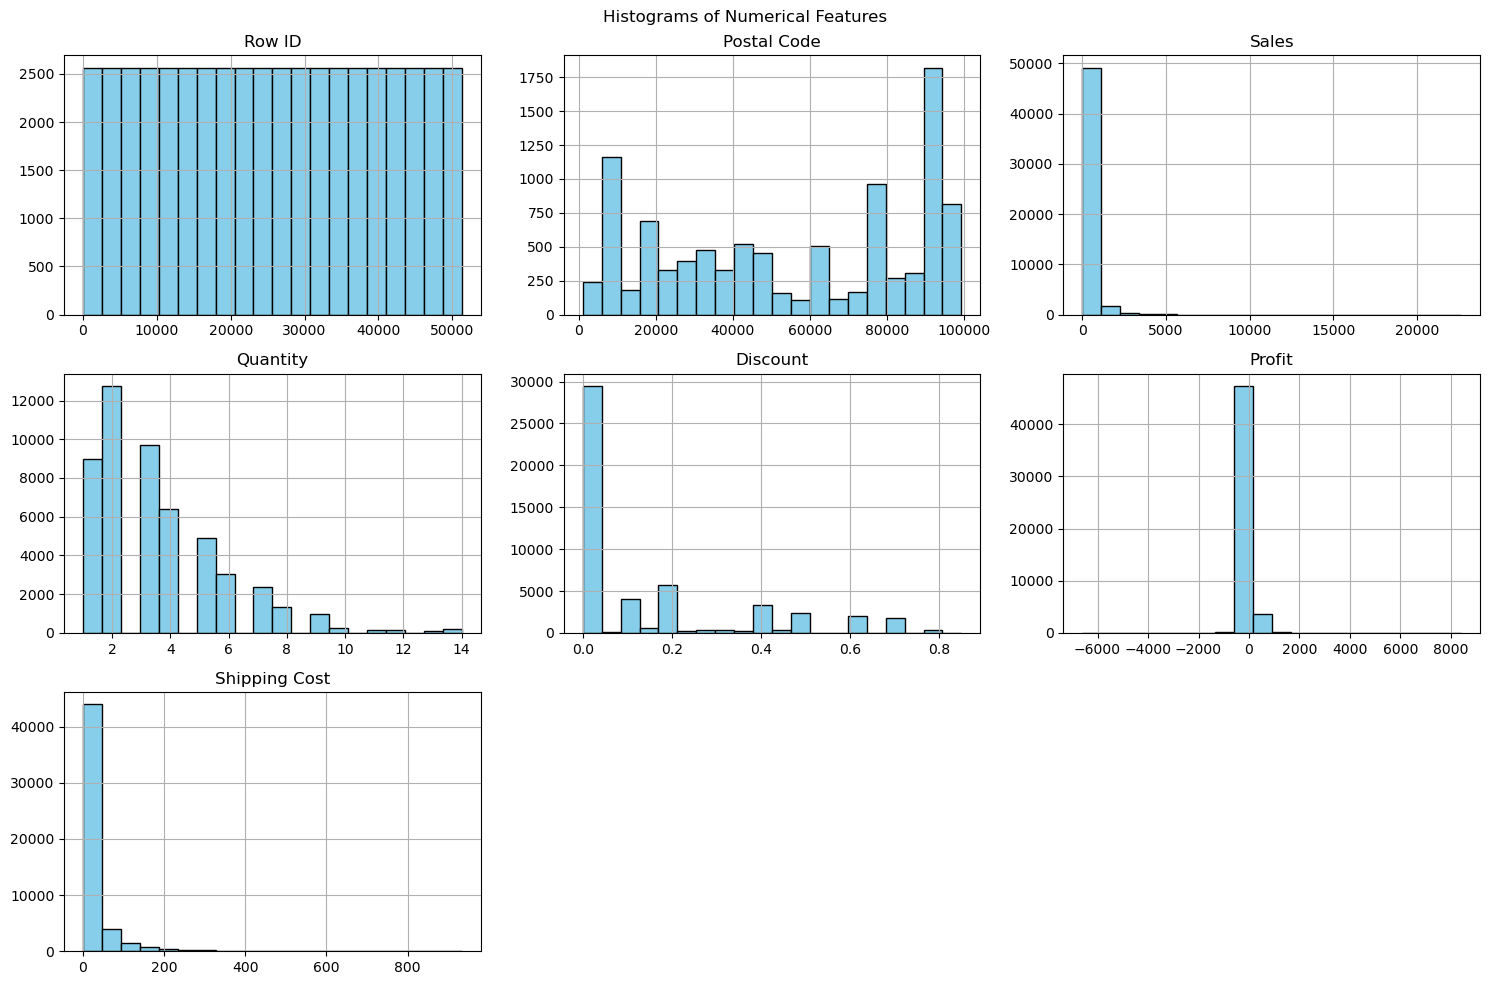

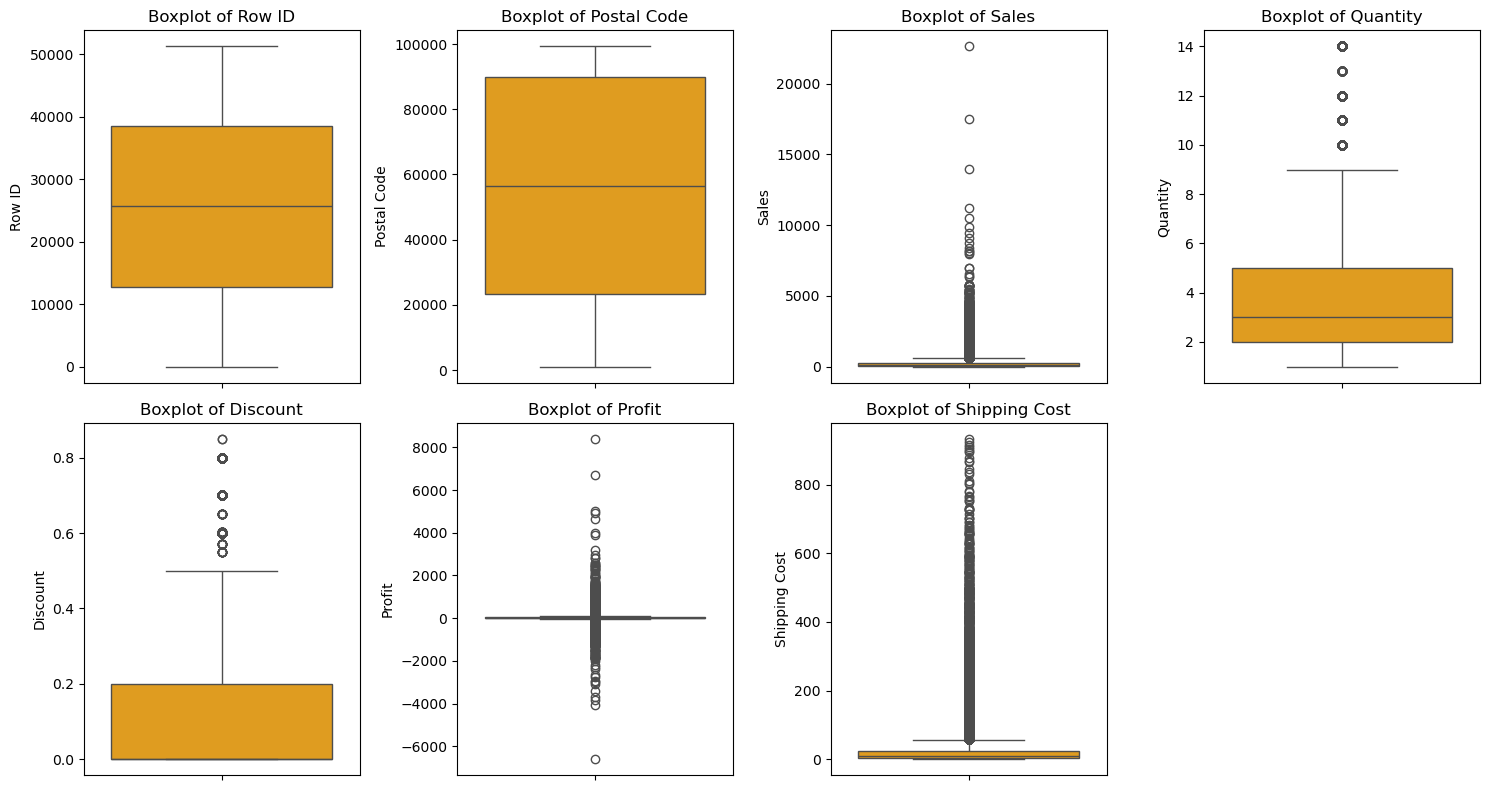

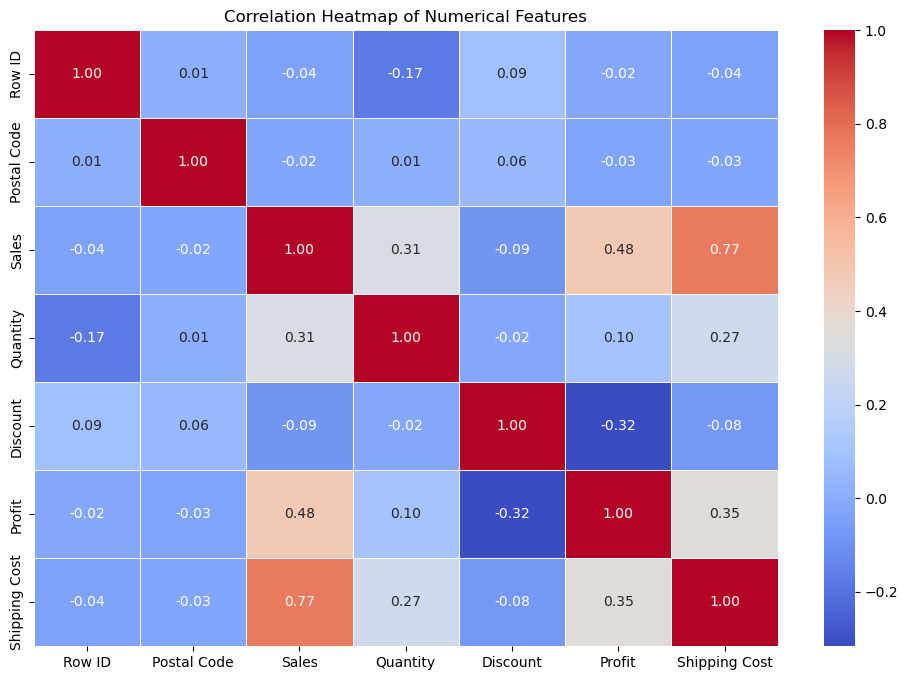

In [53]:
# 1. Histograms for distributions
numerical_cols.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

# 2. Boxplots for outlier detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols.columns, 1):
    plt.subplot(2, (len(numerical_cols.columns)+1)//2, i)
    sns.boxplot(data=df, y=col, color='orange')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 3. Heatmap for correlation
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Deliverables: